In [1]:
import pandas as pd
import tensorflow as tf

time: 21.4 s


In [2]:
df = pd.read_csv('New_capstone_file.csv')

time: 3.1 s


In [3]:
df.drop(df[df['readmitted']=='NO'].index.tolist(),axis=0,inplace=True)

time: 248 ms


In [4]:
df.describe(include='O')

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,...,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902
unique,5,2,10,109,104,105,4,4,4,4,...,1,4,4,2,2,1,1,2,2,2
top,Caucasian,Female,[70-80),Other Forms Of Heart Disease,Other Forms Of Heart Disease,Diabetes mellitus type 2,None,None,No,No,...,No,No,No,No,No,No,No,No,Yes,>30
freq,36442,25670,12544,5588,7337,6766,44305,39426,38257,46057,...,46902,20705,46566,46894,46901,46902,46902,24072,37429,35545


time: 1.39 s


In [5]:
df['readmitted'].value_counts()

>30    35545
<30    11357
Name: readmitted, dtype: int64

time: 30.1 ms


In [6]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,diag_1,diag_2,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_ovrll_prcdrs,num_prvs_vists
1,Caucasian,Female,[10-20),1,1,7,3,18,Other Metabolic Disorders And Immunity Disorders,Diabetes mellitus type 1,...,No,No,No,No,No,Ch,Yes,>30,59,0
5,Caucasian,Male,[50-60),2,1,2,3,16,Ischemic Heart Disease,Ischemic Heart Disease,...,No,No,No,No,No,No,Yes,>30,37,0
7,Caucasian,Male,[70-80),1,1,7,5,12,Other Forms Of Heart Disease,Chronic Obstructive Pulmonary Disease And Alli...,...,No,No,No,No,No,No,Yes,>30,73,0
10,AfricanAmerican,Female,[40-50),1,1,7,9,17,Diabetes mellitus type 2,Hypertensive Disease,...,No,No,No,No,No,No,Yes,>30,49,0
11,AfricanAmerican,Male,[60-70),2,1,4,7,11,Malignant Neoplasm Of Digestive Organs And Per...,Diseases Of The Blood And Blood-Forming Organs,...,No,No,No,No,No,Ch,Yes,<30,62,0


time: 146 ms


In [7]:
df.skew()

admission_type_id           1.598342
discharge_disposition_id    2.763706
admission_source_id         0.996005
time_in_hospital            1.069846
num_medications             1.210445
number_diagnoses           -1.079631
num_ovrll_prcdrs           -0.263264
num_prvs_vists              4.787878
dtype: float64

time: 656 ms


In [8]:
sk_l = ['time_in_hospital',
'num_medications','number_diagnoses','num_ovrll_prcdrs','num_prvs_vists']

time: 2.99 ms


In [9]:
from scipy.stats import boxcox

time: 3.06 s


In [10]:
for i in sk_l:
    df[i] = list(boxcox(df[i]+1)[0])

time: 2.43 s


In [11]:
df.skew()

admission_type_id           1.598342
discharge_disposition_id    2.763706
admission_source_id         0.996005
time_in_hospital            0.005394
num_medications             0.021190
number_diagnoses            0.026191
num_ovrll_prcdrs           -0.194922
num_prvs_vists              0.206708
dtype: float64

time: 2.03 s


In [12]:
df.shape

(46902, 42)

time: 12 ms


In [13]:
import statsmodels.api

time: 2.41 s


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot_outliers_plot(df, columns=[]):
    """
       We Plot the outliers of non categorical columns in the data set
       Parameters :
       df : DataFrame
       columns : If we want only specific columns , we can use this list
       Returns :
       Boxplot of the columns
    """
    # Importing the Libraries required

    # Taking the columns in the data frame If columns list is empty
    if len(columns) == 0:
        columns = df.columns
    # Taking columns in columns list if columns list is not empty
    elif len(columns) != 0:
        columns = columns
    # Correct backend code
    else:
        raise ValueError('Something wrong in backend code here')
    # Taking column from columns list
    for column in columns:
        # The column should be present in DataFrame
        if column in df.columns:
            # We can only calculate outliers for non-categorical columns
            if df[column].dtype != 'O':
                print(column)
                sns.boxplot(df[column])
                plt.show()
            else:
                print('Cannot find Outliers for ', column,
                      'as it is a categorical column')
                print('\n')
        # Column should be in DataFrame
        elif column not in df.columns:
            raise ValueError('The column is not in the DataFrame')
        # Correct backend code
        else:
            raise ValueError('Something wrong in backend code here') 

time: 2.06 s


Cannot find Outliers for  race as it is a categorical column


Cannot find Outliers for  gender as it is a categorical column


Cannot find Outliers for  age as it is a categorical column


admission_type_id


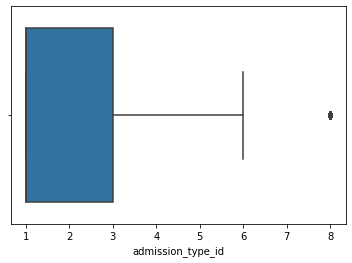

discharge_disposition_id


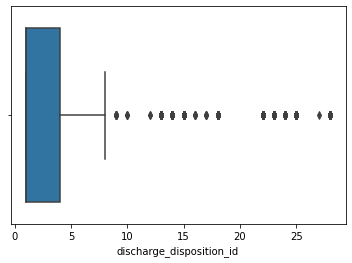

admission_source_id


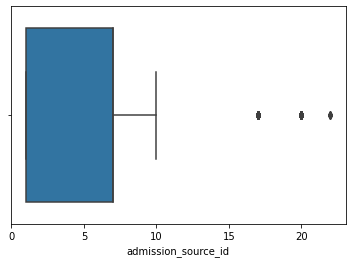

time_in_hospital


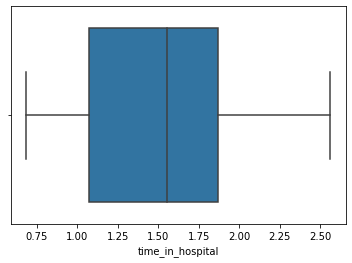

num_medications


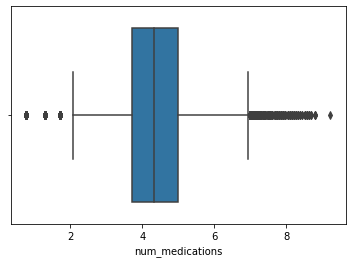

Cannot find Outliers for  diag_1 as it is a categorical column


Cannot find Outliers for  diag_2 as it is a categorical column


Cannot find Outliers for  diag_3 as it is a categorical column


number_diagnoses


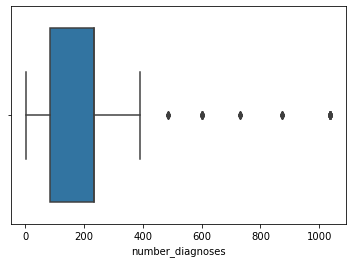

Cannot find Outliers for  max_glu_serum as it is a categorical column


Cannot find Outliers for  A1Cresult as it is a categorical column


Cannot find Outliers for  metformin as it is a categorical column


Cannot find Outliers for  repaglinide as it is a categorical column


Cannot find Outliers for  nateglinide as it is a categorical column


Cannot find Outliers for  chlorpropamide as it is a categorical column


Cannot find Outliers for  glimepiride as it is a categorical column


Cannot find Outliers for  acetohexamide as it is a categorical column


Cannot find Outliers for  glipizide as it is a categorical column


Cannot find Outliers for  glyburide as it is a categorical column


Cannot find Outliers for  tolbutamide as it is a categorical column


Cannot find Outliers for  pioglitazone as it is a categorical column


Cannot find Outliers for  rosiglitazone as it is a categorical column


Cannot find Outliers for  acarbose as it is a categorical column


Cannot find Outliers 

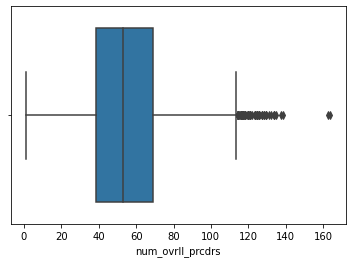

num_prvs_vists


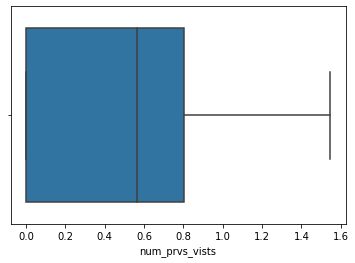

time: 14.7 s


In [15]:
boxplot_outliers_plot(df)

In [16]:
sk_l

['time_in_hospital',
 'num_medications',
 'number_diagnoses',
 'num_ovrll_prcdrs',
 'num_prvs_vists']

time: 8.01 ms


In [17]:
df.shape

(46902, 42)

time: 12 ms


In [18]:
s_df = df[sk_l]
s_df

,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
1,1.347385,4.745734,232.457764,68.922859,0.000000
5,1.347385,4.479598,232.457764,42.324629,0.000000
7,1.727118,3.873316,172.674075,86.115157,0.000000
10,2.196569,4.615248,232.457764,56.760271,0.000000
11,1.992716,3.701729,123.820206,72.591828,0.000000
...,...,...,...,...,...
101754,2.196569,6.293682,232.457764,60.397551,0.000000
101755,2.562211,5.647760,232.457764,93.534091,0.567018
101756,1.074080,4.615248,232.457764,60.397551,0.941026
101760,1.869827,5.546231,232.457764,53.133647,1.147826


time: 115 ms


In [19]:
from sklearn.preprocessing import StandardScaler

time: 183 ms


In [20]:
ss = StandardScaler()

time: 5 ms


In [21]:
s_s_df = ss.fit_transform(s_df)

time: 71 ms


In [22]:
s_s_df = pd.DataFrame(s_s_df,columns=sk_l)

time: 10 ms


In [23]:
s_s_df

,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,-0.353541,0.352067,0.788793,0.699943,-1.052481
1,-0.353541,0.095211,0.788793,-0.429853,-1.052481
2,0.414600,-0.489932,0.022613,1.430210,-1.052481
3,1.364225,0.226131,0.788793,0.183321,-1.052481
4,0.951862,-0.655536,-0.603491,0.855788,-1.052481
...,...,...,...,...,...
46897,1.364225,1.846042,0.788793,0.337819,-1.052481
46898,2.103862,1.222642,0.788793,1.745339,0.222471
46899,-0.906393,0.226131,0.788793,0.337819,1.063438
46900,0.703278,1.124653,0.788793,0.029275,1.528431


time: 76 ms


In [24]:
df.shape

(46902, 42)

time: 5 ms


In [25]:
df.drop(sk_l,axis=1,inplace=True)

time: 43 ms


In [26]:
df.shape

(46902, 37)

time: 18 ms


In [27]:
s_s_df.shape

(46902, 5)

time: 7 ms


In [28]:
df.reset_index(inplace=True)

time: 5 ms


In [29]:
df = pd.concat([df,s_s_df],axis=1)

time: 58 ms


In [30]:
df.shape

(46902, 43)

time: 12 ms


In [31]:
df['gender'].value_counts()

Female    25670
Male      21232
Name: gender, dtype: int64

time: 58 ms


df[df['gender']=='Unknown/Invalid'].index.tolist()

df.drop(df[df['gender']=='Unknown/Invalid'].index.tolist(),axis=0,inplace=True)

In [32]:
df.gender = df.gender.map({'Female':0,'Male':1})

time: 19 ms


In [33]:
df.change = df.change.map({'No':0,'Ch':1})

time: 73.1 ms


In [34]:
df.diabetesMed = df.diabetesMed.map({'Yes':0,'No':1})

time: 31 ms


In [35]:
df.diabetesMed.value_counts()

0    37429
1     9473
Name: diabetesMed, dtype: int64

time: 19 ms


In [36]:
l_d = ['acarbose','acetohexamide','chlorpropamide','citoglipton','examide','glimepiride-pioglitazone','glipizide-metformin','glyburide-metformin','metformin-pioglitazone','metformin-rosiglitazone','miglitol','tolazamide','troglitazone','tolbutamide','nateglinide','glyburide']

time: 5 ms


In [37]:
df.drop(l_d,inplace=True,axis=1)

time: 135 ms


In [38]:
X = df.drop('readmitted',axis=1)
y = df['readmitted']

time: 24 ms


In [39]:
X.skew()

index                      -0.036882
gender                      0.190105
admission_type_id           1.598342
discharge_disposition_id    2.763706
admission_source_id         0.996005
change                      0.052982
diabetesMed                 1.484708
time_in_hospital            0.005394
num_medications             0.021190
number_diagnoses            0.026191
num_ovrll_prcdrs           -0.194922
num_prvs_vists              0.206708
dtype: float64

time: 733 ms


In [40]:
y.value_counts()

>30    35545
<30    11357
Name: readmitted, dtype: int64

time: 35 ms


In [41]:
y = y.map({'>30':0,'<30':1})

time: 21 ms


cat_cols = ['diag_1', 'diag_2', 'diag_3']

In [42]:
cat_cols = X.describe(include='O').columns.tolist()

time: 669 ms


In [43]:
from sklearn.base import BaseEstimator
class MeanEncoding(BaseEstimator):

    """   In Mean Encoding we take the number
    of labels into account along with the target variable
    to encode the labels into machine comprehensible values    """

    def __init__(self, feature, C=0.1):
        self.C = C
        self.feature = feature

    def fit(self, X_train, y_train):

        df = pd.DataFrame(
            {'feature': X_train[self.feature], 'target': y_train}).dropna()

        self.global_mean = df.target.mean()
        mean = df.groupby('feature').target.mean()
        size = df.groupby('feature').target.size()

        self.encoding = (self.global_mean * self.C +
                         mean * size) / (self.C + size)

    def transform(self, X_test):

        X_test[self.feature] = X_test[self.feature].map(
            self.encoding).fillna(self.global_mean).values

        return X_test

    def fit_transform(self, X_train, y_train):

        df = pd.DataFrame(
            {'feature': X_train[self.feature], 'target': y_train}).dropna()

        self.global_mean = df.target.mean()
        mean = df.groupby('feature').target.mean()
        size = df.groupby('feature').target.size()
        self.encoding = (self.global_mean * self.C +
                         mean * size) / (self.C + size)

        X_train[self.feature] = X_train[self.feature].map(
            self.encoding).fillna(self.global_mean).values

        return X_train

for f in cat_cols + ['admission_type_id','discharge_disposition_id','admission_source_id']:
    me = MeanEncoding(f, C=0.01 * len(X[f].unique()))
    me.fit(X, y)
    X = me.transform(X)

time: 2.05 s


In [44]:
X

,index,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,1,0.240931,0,0.151549,0.243674,0.206571,0.236728,0.263696,0.289953,0.345712,...,0.244011,0.243954,0.252058,1,0,-0.353541,0.352067,0.788793,0.699943,-1.052481
1,5,0.240931,1,0.219908,0.242545,0.206571,0.263651,0.231501,0.206477,0.234852,...,0.244011,0.243954,0.246712,0,0,-0.353541,0.095211,0.788793,-0.429853,-1.052481
2,7,0.240931,1,0.244659,0.243674,0.206571,0.236728,0.234254,0.212776,0.234852,...,0.244011,0.243954,0.229703,0,0,0.414600,-0.489932,0.022613,1.430210,-1.052481
3,10,0.245193,0,0.238560,0.243674,0.206571,0.236728,0.250146,0.231240,0.290121,...,0.244011,0.243954,0.246712,0,0,1.364225,0.226131,0.788793,0.183321,-1.052481
4,11,0.245193,1,0.240600,0.242545,0.206571,0.314975,0.285527,0.214526,0.398817,...,0.244011,0.243954,0.246712,1,0,0.951862,-0.655536,-0.603491,0.855788,-1.052481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46897,101754,0.240931,0,0.244659,0.243674,0.206571,0.236728,0.257539,0.276183,0.234852,...,0.244011,0.243954,0.246712,1,0,1.364225,1.846042,0.788793,0.337819,-1.052481
46898,101755,0.245347,0,0.238560,0.243674,0.206571,0.236728,0.225332,0.245917,0.273813,...,0.244011,0.243954,0.252058,1,0,2.103862,1.222642,0.788793,1.745339,0.222471
46899,101756,0.245347,0,0.240600,0.243674,0.206571,0.236728,0.247789,0.248034,0.234642,...,0.244011,0.243954,0.246712,0,0,-0.906393,0.226131,0.788793,0.337819,1.063438
46900,101760,0.245193,0,0.240600,0.243674,0.206571,0.236728,0.266530,0.285588,0.200997,...,0.244011,0.215390,0.263256,1,0,0.703278,1.124653,0.788793,0.029275,1.528431


time: 319 ms


In [45]:
X.describe()

,index,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
count,46902.000000,46902.000000,46902.000000,46902.000000,46902.000000,46902.000000,46902.000000,46902.000000,46902.000000,46902.000000,...,46902.000000,46902.000000,46902.000000,46902.00000,46902.000000,4.690200e+04,4.690200e+04,4.690200e+04,4.690200e+04,4.690200e+04
mean,50180.769583,0.242143,0.452689,0.242143,0.242143,0.242131,0.242142,0.242101,0.242128,0.242076,...,0.242143,0.242143,0.242143,0.48676,0.201974,-2.182446e-14,-6.011587e-15,9.172045e-14,-8.411332e-16,4.979860e-14
std,28593.155204,0.003694,0.497762,0.016895,0.010642,0.065530,0.019411,0.043236,0.034160,0.031494,...,0.007082,0.007164,0.012167,0.49983,0.401477,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,1.000000,0.240931,0.000000,0.103925,0.208024,0.008939,0.014779,0.013138,0.027857,0.031584,...,0.217210,0.185269,0.229703,0.00000,0.000000,-1.696824e+00,-3.484048e+00,-2.162847e+00,-2.184362e+00,-1.052481e+00
25%,25835.500000,0.240931,0.000000,0.238560,0.242545,0.206571,0.236728,0.210697,0.230269,0.226299,...,0.244011,0.243954,0.229703,0.00000,0.000000,-9.063932e-01,-6.555360e-01,-1.102373e+00,-5.817730e-01,-1.052481e+00
50%,50700.000000,0.240931,0.000000,0.244659,0.243674,0.206571,0.236728,0.234254,0.234021,0.234852,...,0.244011,0.243954,0.246712,0.00000,0.000000,7.078775e-02,-4.120113e-02,7.887932e-01,2.927472e-02,2.224713e-01
75%,73883.500000,0.240931,1.000000,0.250331,0.243674,0.282842,0.245106,0.257539,0.248034,0.252125,...,0.244011,0.243954,0.252058,1.00000,0.000000,7.032783e-01,5.906846e-01,7.887932e-01,6.999432e-01,7.562381e-01
max,101761.000000,0.287601,1.000000,0.316344,0.331254,0.921835,0.447356,0.798028,0.645204,0.739098,...,0.285687,0.267591,0.263256,1.00000,1.000000,2.103862e+00,4.669293e+00,1.110575e+01,4.734030e+00,2.425246e+00


time: 597 ms


In [46]:
X

,index,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,1,0.240931,0,0.151549,0.243674,0.206571,0.236728,0.263696,0.289953,0.345712,...,0.244011,0.243954,0.252058,1,0,-0.353541,0.352067,0.788793,0.699943,-1.052481
1,5,0.240931,1,0.219908,0.242545,0.206571,0.263651,0.231501,0.206477,0.234852,...,0.244011,0.243954,0.246712,0,0,-0.353541,0.095211,0.788793,-0.429853,-1.052481
2,7,0.240931,1,0.244659,0.243674,0.206571,0.236728,0.234254,0.212776,0.234852,...,0.244011,0.243954,0.229703,0,0,0.414600,-0.489932,0.022613,1.430210,-1.052481
3,10,0.245193,0,0.238560,0.243674,0.206571,0.236728,0.250146,0.231240,0.290121,...,0.244011,0.243954,0.246712,0,0,1.364225,0.226131,0.788793,0.183321,-1.052481
4,11,0.245193,1,0.240600,0.242545,0.206571,0.314975,0.285527,0.214526,0.398817,...,0.244011,0.243954,0.246712,1,0,0.951862,-0.655536,-0.603491,0.855788,-1.052481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46897,101754,0.240931,0,0.244659,0.243674,0.206571,0.236728,0.257539,0.276183,0.234852,...,0.244011,0.243954,0.246712,1,0,1.364225,1.846042,0.788793,0.337819,-1.052481
46898,101755,0.245347,0,0.238560,0.243674,0.206571,0.236728,0.225332,0.245917,0.273813,...,0.244011,0.243954,0.252058,1,0,2.103862,1.222642,0.788793,1.745339,0.222471
46899,101756,0.245347,0,0.240600,0.243674,0.206571,0.236728,0.247789,0.248034,0.234642,...,0.244011,0.243954,0.246712,0,0,-0.906393,0.226131,0.788793,0.337819,1.063438
46900,101760,0.245193,0,0.240600,0.243674,0.206571,0.236728,0.266530,0.285588,0.200997,...,0.244011,0.215390,0.263256,1,0,0.703278,1.124653,0.788793,0.029275,1.528431


time: 197 ms


In [47]:
X.shape

(46902, 26)

time: 15 ms


In [48]:
X_constant = statsmodels.api.add_constant(X)

time: 57 ms


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]


time: 16.9 s


In [50]:
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
index,1.229947
race,1.010947
gender,1.011185
age,1.026802
admission_type_id,1.344281
discharge_disposition_id,1.069510
admission_source_id,1.094321
diag_1,1.056916
diag_2,1.037761
diag_3,1.041575


time: 51 ms


In [51]:
len(X.columns)

26

time: 8.08 ms


In [52]:
import imblearn

time: 4.7 s


In [53]:
smote = imblearn.over_sampling.SMOTE(random_state=96)

time: 7 ms


In [54]:
X_rs,y_rs = smote.fit_resample(X,y)

time: 2.73 s


In [55]:
X_rs.shape

(71090, 26)

time: 6 ms


In [56]:
y_rs.value_counts()

1    35545
0    35545
Name: readmitted, dtype: int64

time: 15 ms


In [57]:
df_new = pd.concat([X_rs,y_rs],axis=1)

time: 37 ms


In [58]:
df_new

,index,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,...,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists,readmitted
0,1,0.240931,0,0.151549,0.243674,0.206571,0.236728,0.263696,0.289953,0.345712,...,0.243954,0.252058,1,0,-0.353541,0.352067,0.788793,0.699943,-1.052481,0
1,5,0.240931,1,0.219908,0.242545,0.206571,0.263651,0.231501,0.206477,0.234852,...,0.243954,0.246712,0,0,-0.353541,0.095211,0.788793,-0.429853,-1.052481,0
2,7,0.240931,1,0.244659,0.243674,0.206571,0.236728,0.234254,0.212776,0.234852,...,0.243954,0.229703,0,0,0.414600,-0.489932,0.022613,1.430210,-1.052481,0
3,10,0.245193,0,0.238560,0.243674,0.206571,0.236728,0.250146,0.231240,0.290121,...,0.243954,0.246712,0,0,1.364225,0.226131,0.788793,0.183321,-1.052481,0
4,11,0.245193,1,0.240600,0.242545,0.206571,0.314975,0.285527,0.214526,0.398817,...,0.243954,0.246712,1,0,0.951862,-0.655536,-0.603491,0.855788,-1.052481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71085,12469,0.240931,1,0.241170,0.249835,0.308873,0.241521,0.350876,0.237429,0.247951,...,0.243954,0.239434,0,0,0.721962,1.130808,0.788793,0.613429,0.222471,1
71086,72575,0.240931,0,0.241405,0.252307,0.206571,0.243443,0.224244,0.218394,0.259376,...,0.243954,0.233078,0,0,-0.906393,-0.746248,0.022613,-1.482995,-0.030516,1
71087,6517,0.243329,1,0.238560,0.249523,0.319038,0.241278,0.269767,0.234706,0.217541,...,0.243954,0.237475,0,0,-0.353541,-0.407819,-0.776990,-0.729237,-0.226008,1
71088,92986,0.240931,0,0.242545,0.249283,0.219715,0.241091,0.262024,0.229568,0.351165,...,0.243954,0.237853,0,0,-0.135076,0.314446,-0.396589,-0.260814,1.158414,1


time: 406 ms


In [61]:
df_new.to_csv('Capstone_model_3.csv',index=False)

time: 15.1 s


In [62]:
y_rs.value_counts()

1    35545
0    35545
Name: readmitted, dtype: int64

time: 39.5 ms
